In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/H2GTRM.TTF"  # 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시 설정
warnings.filterwarnings('ignore')

In [2]:
codeshare = pd.read_csv('../data/codeshare_log.csv')
competition = pd.read_csv('../data/competition_info.csv')
participate = pd.read_csv('../data/participate_log.csv')
submission = pd.read_csv('../data/submission_log.csv')
talk = pd.read_csv('../data/talk_log.csv')

In [3]:
dir_path = '../data/'

# EDA
1. competition: 데이콘에서 진행된 공개 AI 경진대회 관련 메타 정보
2. codeshare: 특정 대회에서 발생한 코드 공유 관련 정보
3. participate: 특정 대회에서 발생한 참가자 수 관련 정보
4. submission: 특정 대회에서 발생한 제출 수 관련 정보
5. talk: 특정 대회에서 발생한 토크 관련 정보

In [4]:
display(competition.columns)
display(competition.head())
display(competition.describe())

Index(['ID', '대회명', '키워드', '시작시간', '종료시간', '참여자 수', '상금 정보', '최대 팀원 수',
       '수상자 수', '일일 제출횟수', '평가산식', '참가조건 여부', '연습가능 여부', '아이디어 대회 여부',
       '월간 데이콘 여부', '대회 개요', '데이터 설명', '일정', '상금 상세정보', '규칙'],
      dtype='object')

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,평가산식,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,RMSE,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구..."
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,RMSE,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ..."
2,ID_002,KBO 타자 OPS 예측 경진대회,알고리즘 | 정형 | 회귀 | 스포츠 | WRMSE,2019-02-08,2019-07-18,1103,800만원,5.0,3,3.0,WRMSE,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>KBO 타자 OP...,"<p>약 350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공...",<h2>세부 일정</h2><p><br></p><ul><li>대회 공개 : 2019....,<p>? 총 상금 800만원</p><p><br></p><p>?1위 - 500만원</...,<h2>모델링 규칙</h2><p>\n각 참가자는 3월 31일까지 여러 submiss...
3,ID_003,상점 신용카드 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 매출 | 회귀 | MAE,2019-07-11,2019-10-21,1416,200만원,5.0,3,100.0,MAE,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>상점 신용카드 매...,<p>1. funda_train.csv : 2019-02-28일까지의 상점별 카드 ...,<h2>세부 일정</h2><p>UTC+9 기준</p><p><br></p><ul><l...,<p>?7월 11일부터&nbsp;8월 30일까지 열렸던 대회에 대한 상금은 아래와 ...,<h2>단계별 방식 랭킹\n</h2><p><br></p><p> A. public...
4,ID_004,전력 수요량 예측 경진대회,알고리즘 | 정형 | 회귀 | 공공 | SMAPE,2019-10-01,2019-10-27,789,600만원,4.0,3,3.0,SMAPE,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>전력 수요량 예측...,<p>본 대회에서는 2016년 7월 20일부터 2018년 6월 30일까지의 국내 특...,<h2>세부 일정 </h2><p>UTC+ 9 기준</p><p><br></p><ul>...,<p><strong>데이터 사이언스 콘테스트 부문</strong></p><p>?1등...,<p><br></p><p>SMAPE는 Symmetric Mean Absolute P...


,참여자 수,최대 팀원 수,수상자 수,일일 제출횟수,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,932.704698,4.342282,5.120805,19.020134,0.026846,0.845638,0.167785,0.281879
std,558.565834,1.483111,3.015529,80.626891,0.162177,0.362514,0.374936,0.451432
min,27.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,559.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,819.000000,5.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,1200.000000,5.000000,5.000000,5.000000,0.000000,1.000000,0.000000,1.000000
max,3377.000000,10.000000,20.000000,500.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
display(codeshare.columns)
display(codeshare.head())
display(codeshare.describe())

Index(['ID', '일자', '코드 공유 수', '댓글 수', '조회 수', '공유 수', '다운로드 수', '좋아요 수'], dtype='object')

,ID,일자,코드 공유 수,댓글 수,조회 수,공유 수,다운로드 수,좋아요 수
0,ID_000,2019-12-09,6,0,34237,11,0,50
1,ID_000,2020-04-21,10,0,34568,11,0,50
2,ID_000,2020-07-16,11,0,42386,12,10,62
3,ID_000,2020-10-13,13,0,42394,12,10,62
4,ID_000,2021-09-10,14,1,42395,12,10,62


,코드 공유 수,댓글 수,조회 수,공유 수,다운로드 수,좋아요 수
count,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000,1804.000000
mean,21.005543,41.738359,50459.256098,25.755543,237.931264,224.478936
std,28.144721,63.469972,66575.349426,46.258882,285.560537,363.523153
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,9.000000,12369.250000,2.000000,26.000000,51.000000
50%,12.000000,23.000000,27901.500000,9.000000,134.000000,125.000000
75%,25.000000,48.250000,62877.000000,31.000000,354.000000,246.000000
max,208.000000,624.000000,521471.000000,525.000000,1634.000000,3396.000000


In [6]:
display(participate.columns)
display(participate.head())
display(participate.describe())

Index(['ID', '일자', '참가자 수'], dtype='object')

,ID,일자,참가자 수
0,ID_000,2018-08-31,1
1,ID_001,2018-11-14,1
2,ID_001,2018-12-01,1
3,ID_002,2019-02-11,2
4,ID_002,2019-02-18,1


,참가자 수
count,5185.000000
mean,15.398264
std,19.596600
min,1.000000
25%,5.000000
50%,10.000000
75%,19.000000
max,355.000000


In [7]:
display(submission.columns)
display(submission.head())
display(submission.describe())

Index(['ID', '일자', '제출 수'], dtype='object')

,ID,일자,제출 수
0,ID_000,2018-08-14,2
1,ID_000,2018-08-15,1
2,ID_000,2018-08-16,1
3,ID_000,2018-08-17,1
4,ID_000,2018-08-18,2


,제출 수
count,4892.000000
mean,72.371627
std,73.001797
min,1.000000
25%,22.000000
50%,51.000000
75%,103.000000
max,1208.000000


In [8]:
display(talk.columns)
display(talk.head())
display(talk.describe())

Index(['ID', '일자', '토크 수', '댓글 수', '조회 수', '공유 수', '좋아요 수'], dtype='object')

,ID,일자,토크 수,댓글 수,조회 수,공유 수,좋아요 수
0,ID_000,2018-08-16,1,1,2324,0,5
1,ID_000,2018-08-17,2,2,4729,0,9
2,ID_000,2018-08-21,5,5,9475,0,14
3,ID_000,2018-08-25,6,6,11862,0,18
4,ID_000,2018-08-27,11,11,22621,0,34


,토크 수,댓글 수,조회 수,공유 수,좋아요 수
count,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000
mean,31.630054,50.397476,42859.082306,6.773731,95.857757
std,32.523643,51.031222,45051.214492,13.449535,106.118026
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,10.000000,15.000000,10054.500000,0.000000,22.000000
50%,22.000000,35.000000,26245.000000,3.000000,57.000000
75%,41.000000,67.000000,61871.000000,7.000000,132.000000
max,220.000000,305.000000,268706.000000,111.000000,648.000000


In [9]:
dataframes = {'competition':competition,
              'codeshare':codeshare,
              'participate':participate,
              'submission':submission,
              'talk':talk}

In [10]:
for name, d in dataframes.items():
    print(f"{name}'s columns")
    print("\t{}\n".format(list(d.columns)))

competition's columns
	['ID', '대회명', '키워드', '시작시간', '종료시간', '참여자 수', '상금 정보', '최대 팀원 수', '수상자 수', '일일 제출횟수', '평가산식', '참가조건 여부', '연습가능 여부', '아이디어 대회 여부', '월간 데이콘 여부', '대회 개요', '데이터 설명', '일정', '상금 상세정보', '규칙']

codeshare's columns
	['ID', '일자', '코드 공유 수', '댓글 수', '조회 수', '공유 수', '다운로드 수', '좋아요 수']

participate's columns
	['ID', '일자', '참가자 수']

submission's columns
	['ID', '일자', '제출 수']

talk's columns
	['ID', '일자', '토크 수', '댓글 수', '조회 수', '공유 수', '좋아요 수']


In [11]:
for name, d in dataframes.items():
    print(f"{name}'s info")
    print("{}\n".format(d.info()))

competition's info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          149 non-null    object 
 1   대회명         149 non-null    object 
 2   키워드         149 non-null    object 
 3   시작시간        149 non-null    object 
 4   종료시간        149 non-null    object 
 5   참여자 수       149 non-null    int64  
 6   상금 정보       110 non-null    object 
 7   최대 팀원 수     149 non-null    float64
 8   수상자 수       149 non-null    int64  
 9   일일 제출횟수     149 non-null    float64
 10  평가산식        149 non-null    object 
 11  참가조건 여부     149 non-null    int64  
 12  연습가능 여부     149 non-null    int64  
 13  아이디어 대회 여부  149 non-null    int64  
 14  월간 데이콘 여부   149 non-null    int64  
 15  대회 개요       149 non-null    object 
 16  데이터 설명      146 non-null    object 
 17  일정          149 non-null    object 
 18  상금 상세정보     149 non-null    object 
 19  규칙        

###### 각 file들 시각화

1. competition_log.csv

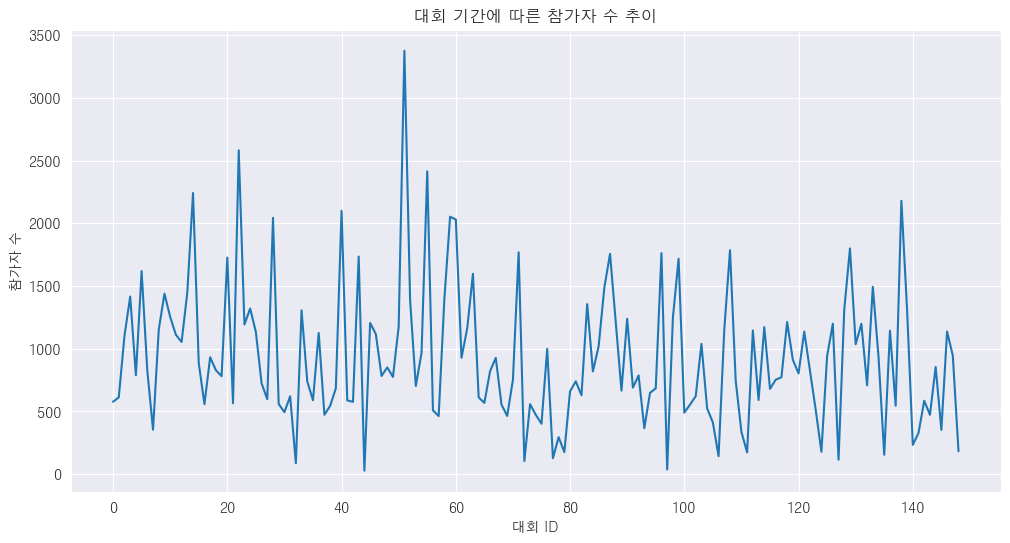

In [12]:
# 대회 기간에 따른 참가자 수 추이 시각화
#   - 대회가 개최된 기간 동안의 참가자 수 추이를 확인하는 그래프
plt.figure(figsize=(12, 6))
competition['참여자 수'].plot(kind='line')
plt.title('대회 기간에 따른 참가자 수 추이')
plt.xlabel('대회 ID')
plt.ylabel('참가자 수')
plt.show()

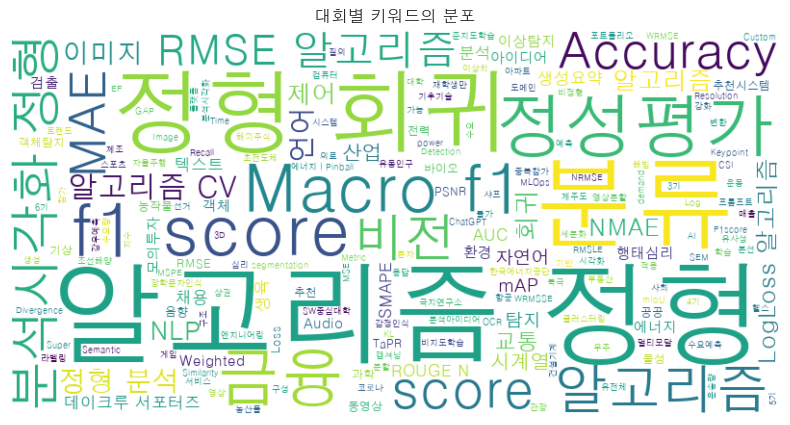

In [13]:
# 대회별 키워드의 분포 시각화
#   - 대회 별로 어떤 키워드가 많이 사용 되었는 지 확인하는 워드 클라우드
from wordcloud import WordCloud

# 키워드를 모두 합치기
keywords = ' '.join(competition['키워드'])

# WordCloud 생성 및 시각화
wc = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('대회별 키워드의 분포')
plt.show()


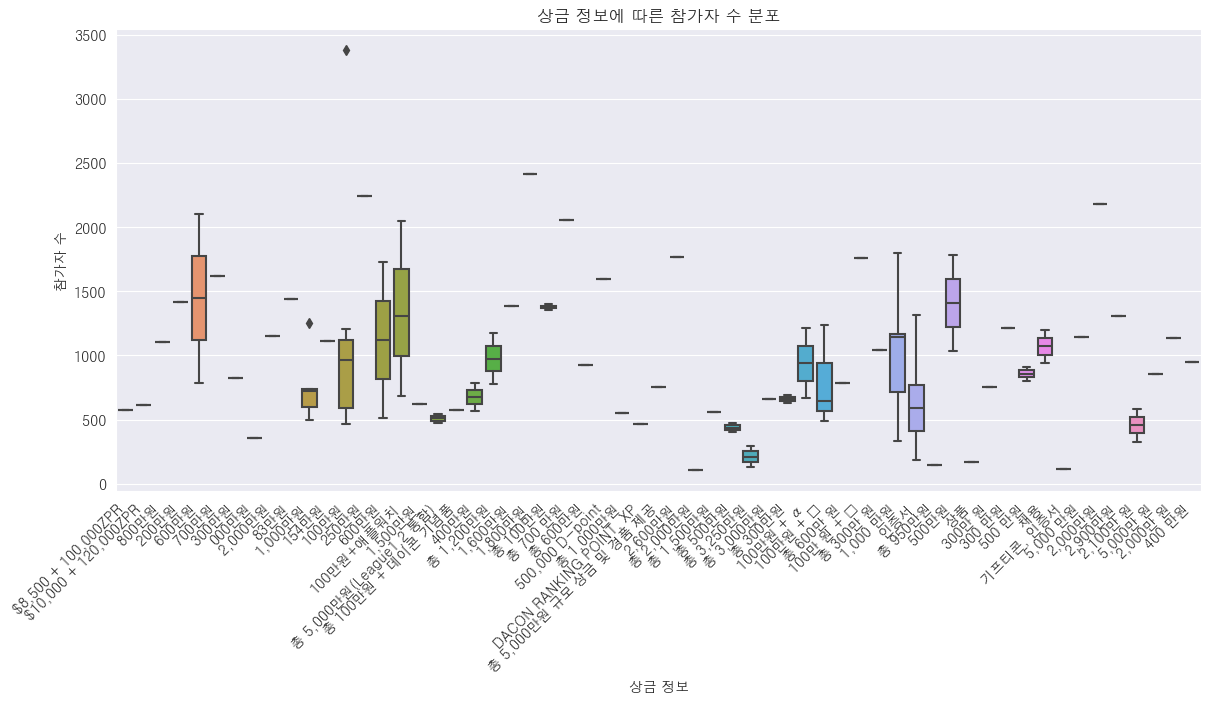

In [14]:
# 상금 정보 분포 시각화
#   - 대회 별 상금의 분포를 확인하는 boxplot
plt.figure(figsize=(14, 6))  # 그림의 크기를 늘림
sns.boxplot(x='상금 정보', y='참여자 수', data=competition)
plt.title('상금 정보에 따른 참가자 수 분포')
plt.xlabel('상금 정보')
plt.ylabel('참가자 수')
plt.xticks(rotation=45, ha='right')  # x축 눈금을 45도 기울임
plt.show()

2. codeshare_log.csv

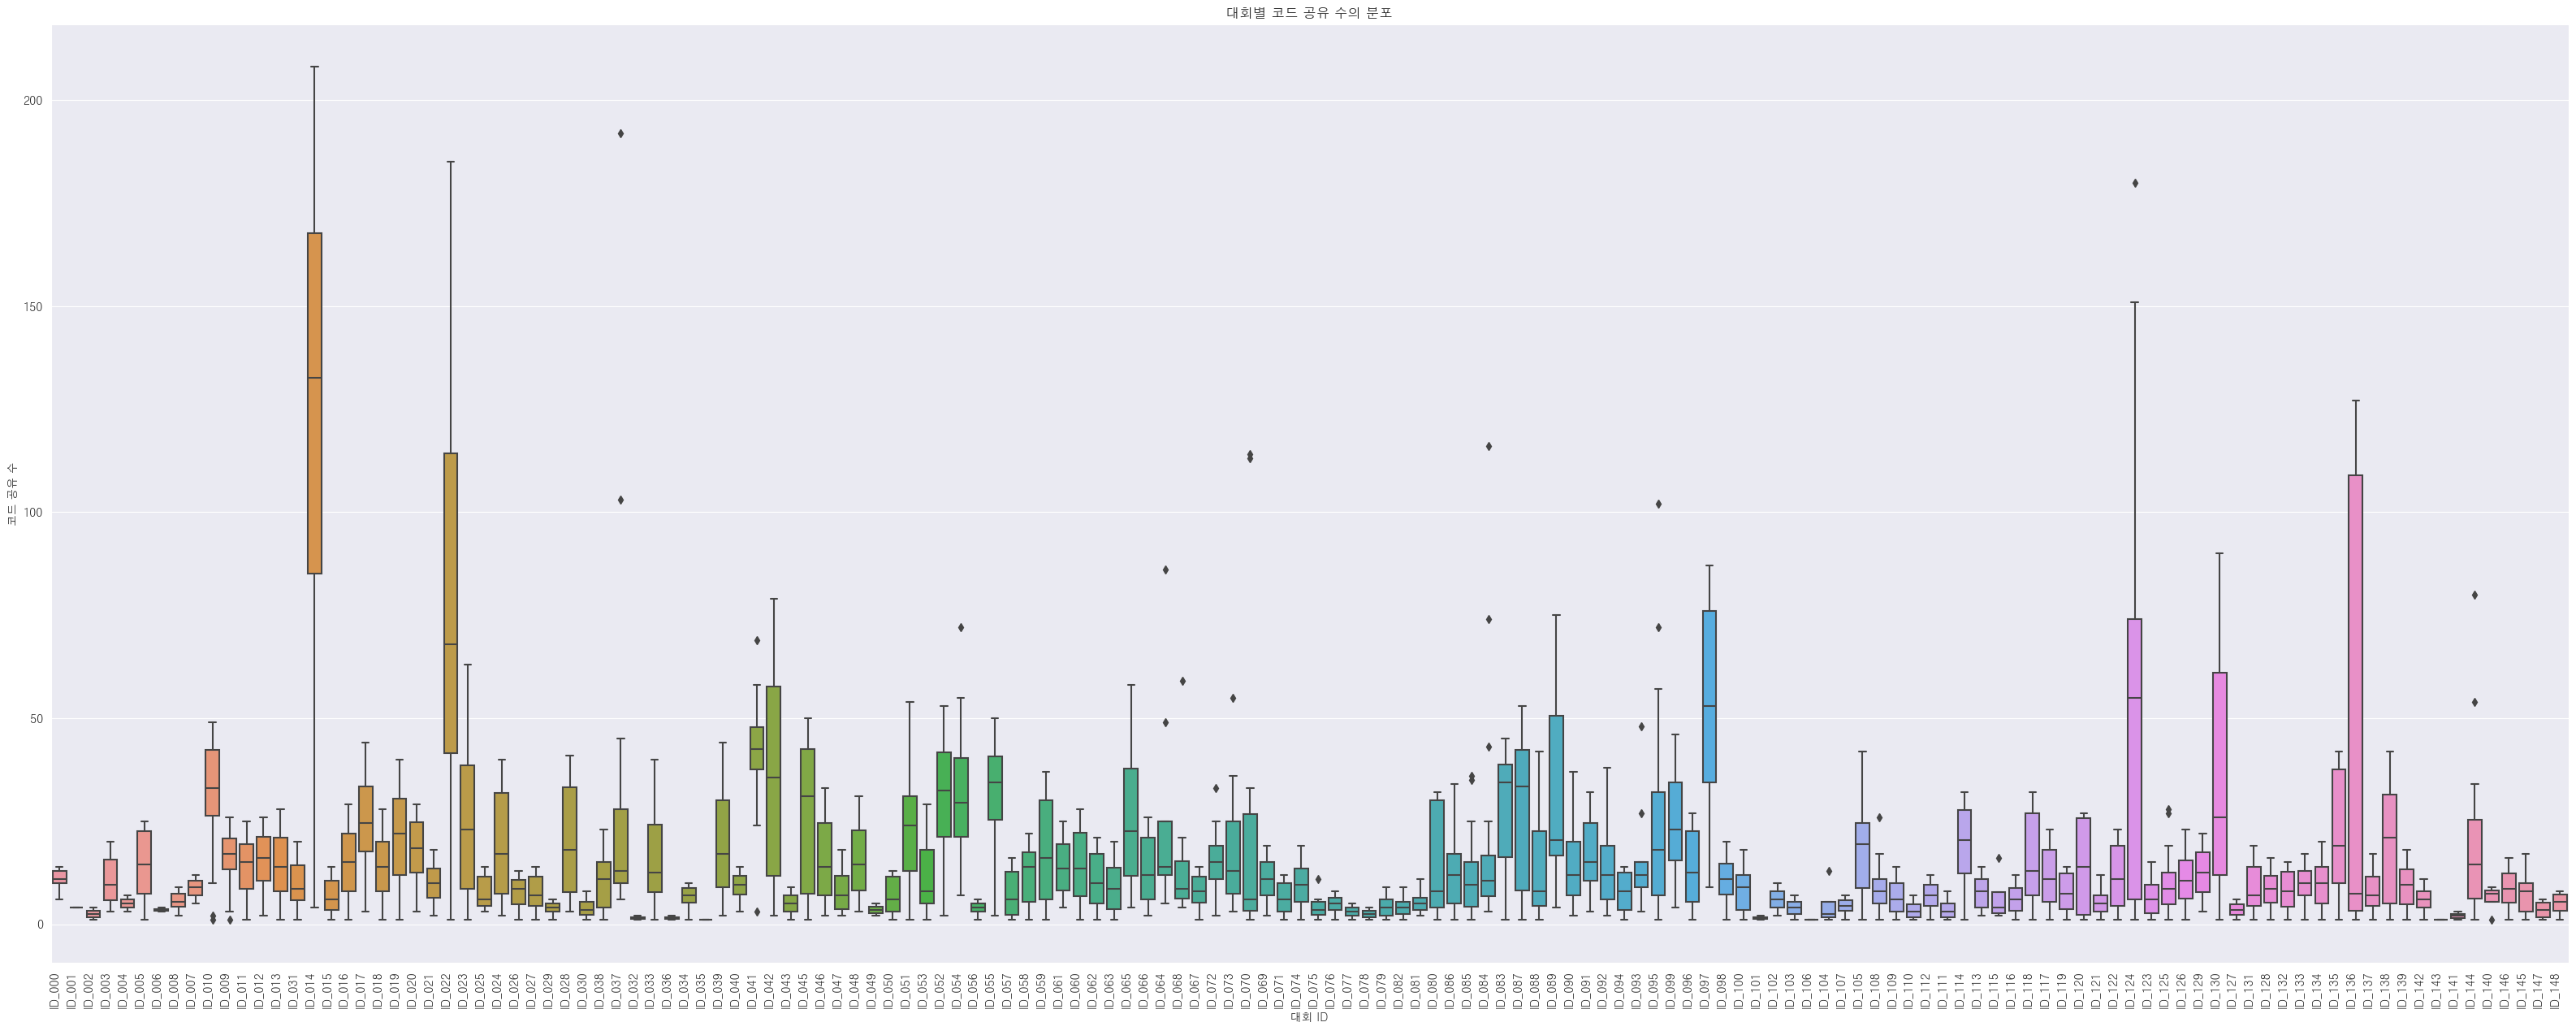

In [33]:
# 대회별 코드 코드 공유 수의 분포 시각화
#    - 대회별로 코드 공유 수의 분포를 확인하는 boxplot
plt.figure(figsize=(40, 15))
sns.boxplot(x='ID', y='코드 공유 수', data=codeshare)
plt.title('대회별 코드 공유 수의 분포')
plt.xlabel('대회 ID')
plt.xticks(rotation=90, ha='right')  # x축 눈금을 90도 기울임
plt.ylabel('코드 공유 수')
plt.show()

3. participate_log.csv

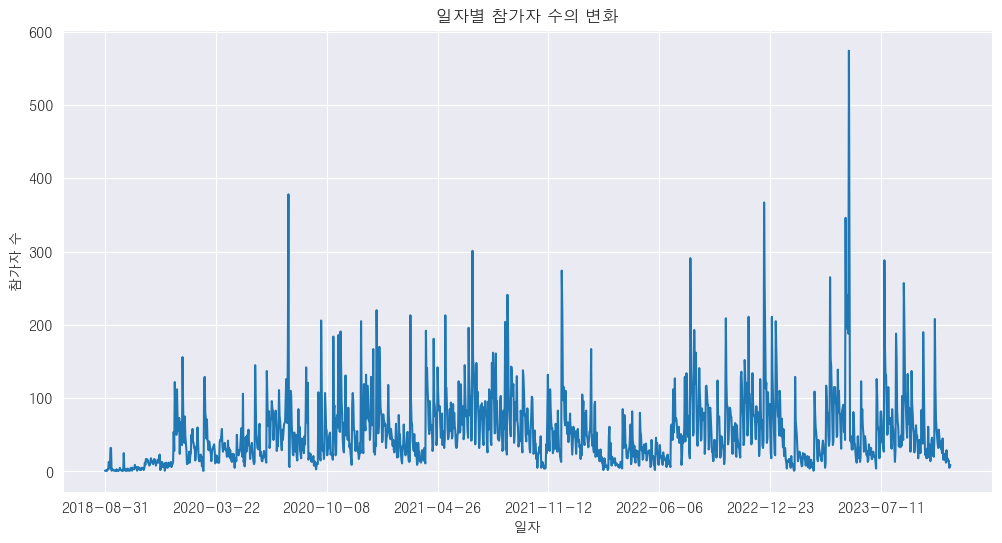

In [22]:
# 일자별 참가자 수 의 변화 시각화
#    - 일자별 참가자 수의 추이를 확인하는 추이 그래프
plt.figure(figsize=(12, 6))
participate.groupby('일자')['참가자 수'].sum().plot(kind='line')
plt.title('일자별 참가자 수의 변화')
plt.xlabel('일자')
plt.ylabel('참가자 수')
plt.show()

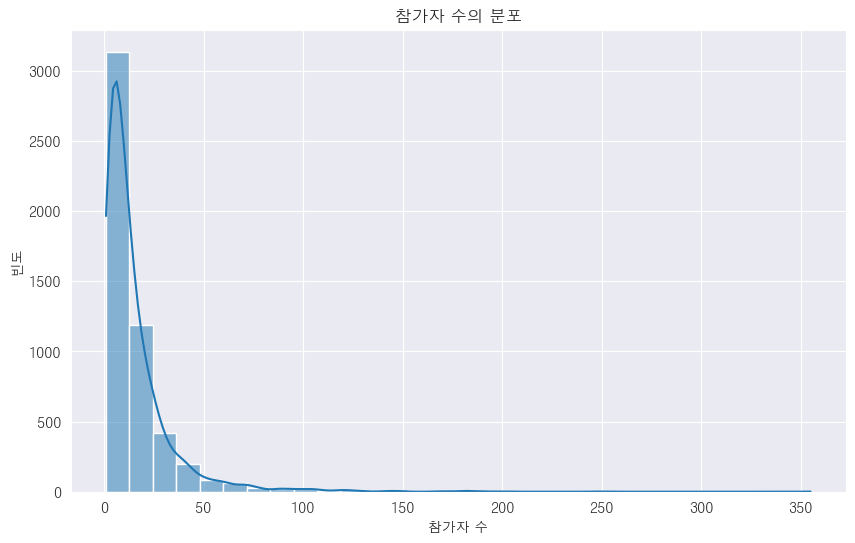

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(participate['참가자 수'], bins=30, kde=True)
plt.title('참가자 수의 분포')
plt.xlabel('참가자 수')
plt.ylabel('빈도')
plt.show()

4. submission_log.csv

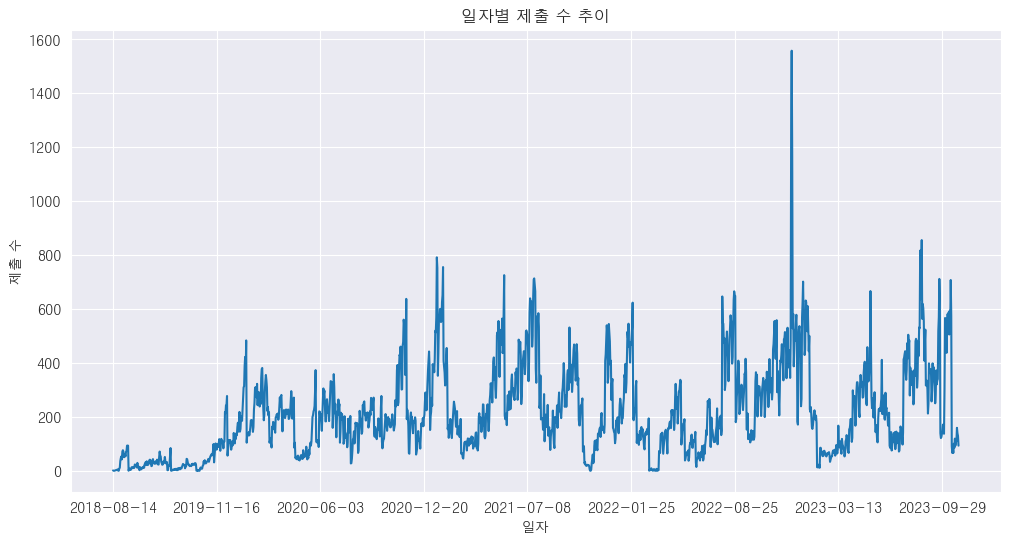

In [25]:
# 일자별 제출 수 추이 시각화
plt.figure(figsize=(12, 6))
submission.groupby('일자')['제출 수'].sum().plot(kind='line')
plt.title('일자별 제출 수 추이')
plt.xlabel('일자')
plt.ylabel('제출 수')
plt.show()


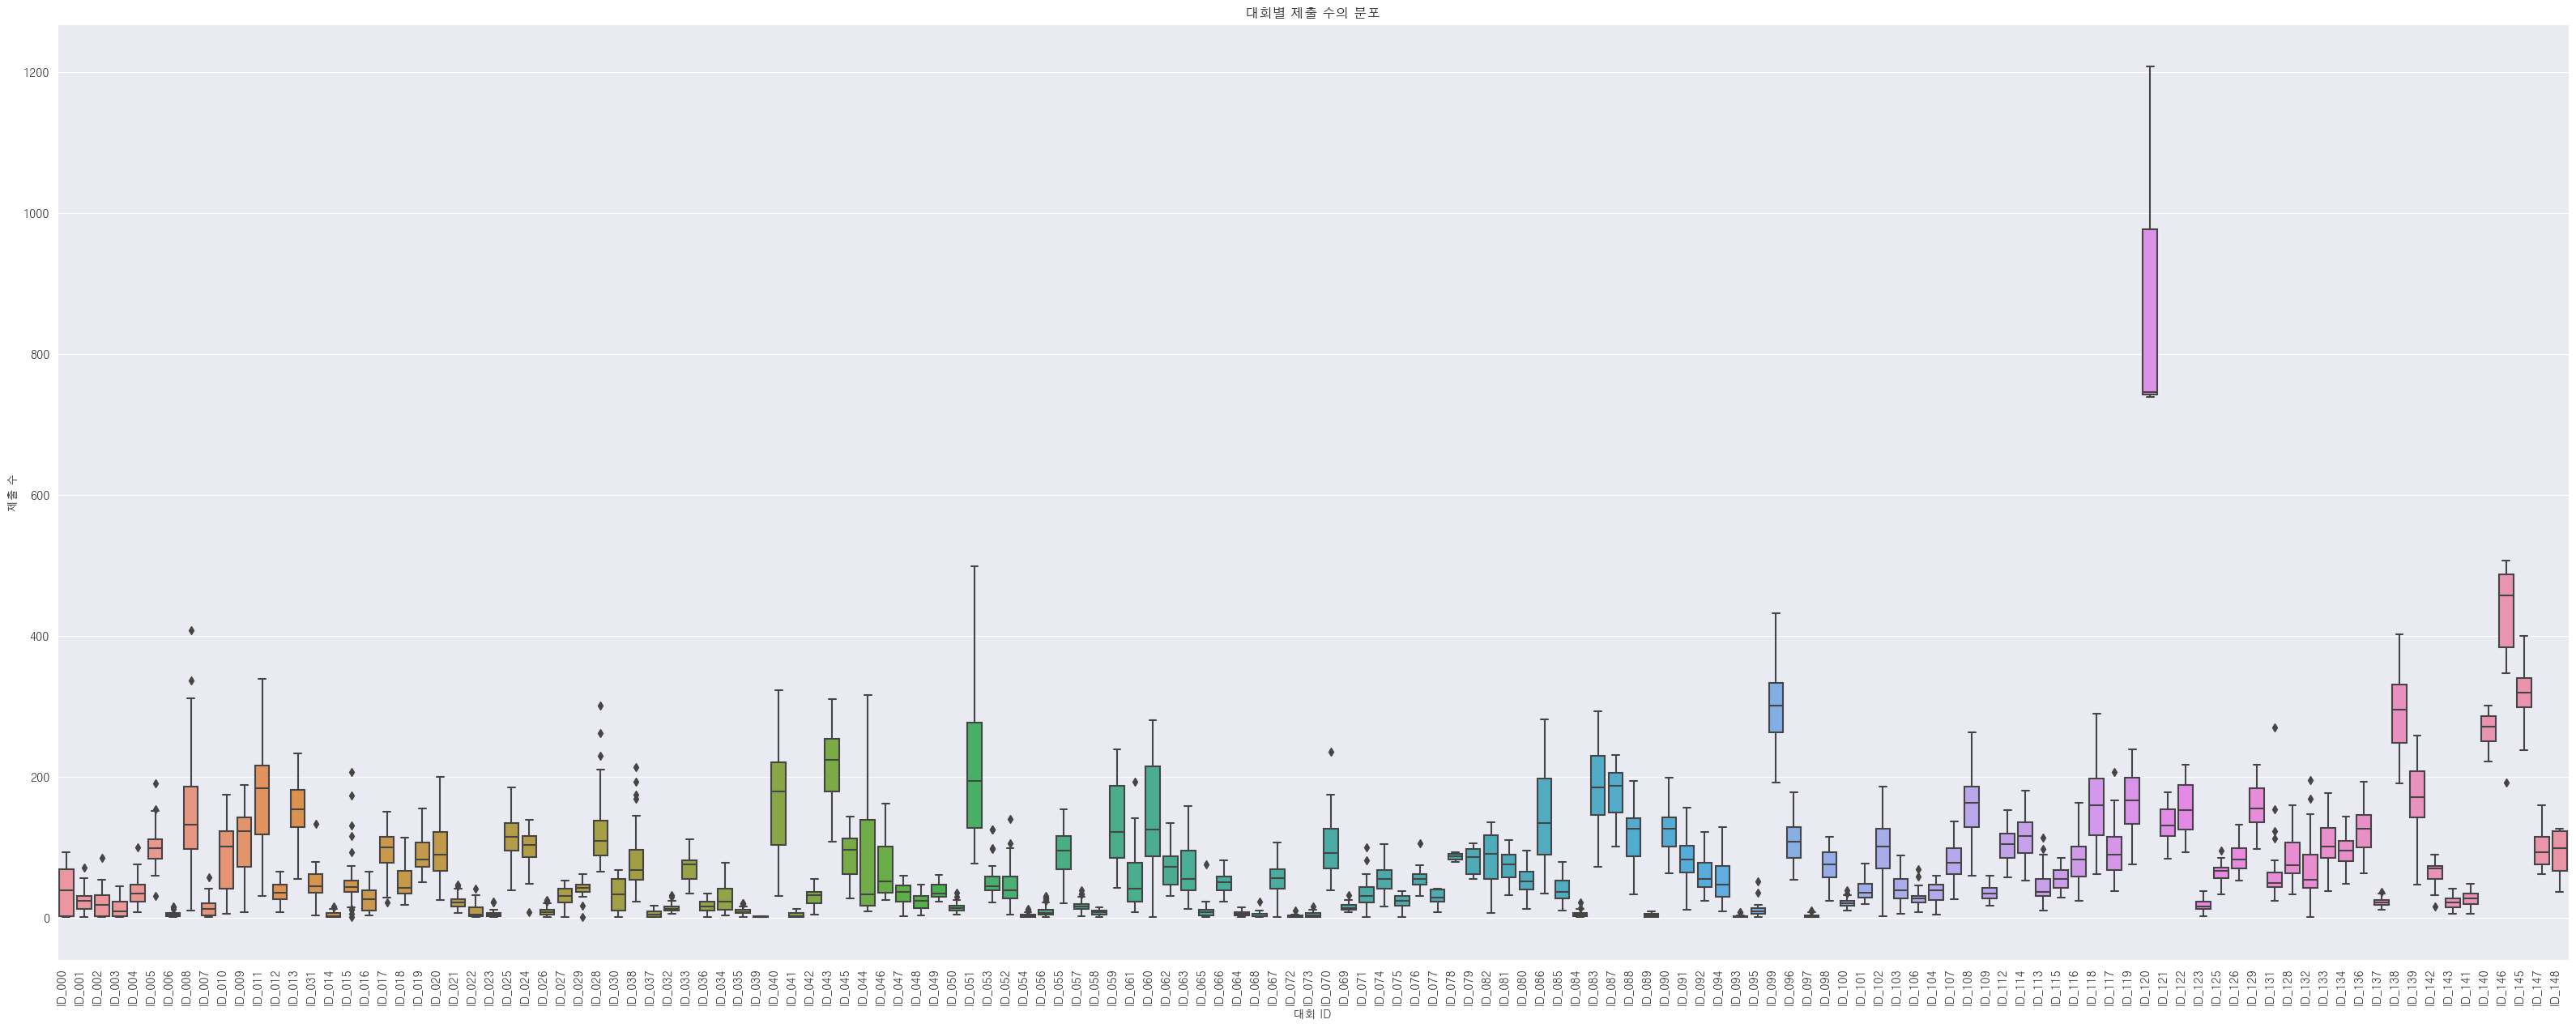

In [34]:
# 대회 ID별 제출 수의 분포
plt.figure(figsize=(40, 15))
sns.boxplot(x='ID', y='제출 수', data=submission)
plt.title('대회별 제출 수의 분포')
plt.xlabel('대회 ID')
plt.xticks(rotation=90, ha='right')  # x축 눈금을 90도 기울임
plt.ylabel('제출 수')
plt.show()

5. talk_log.csv

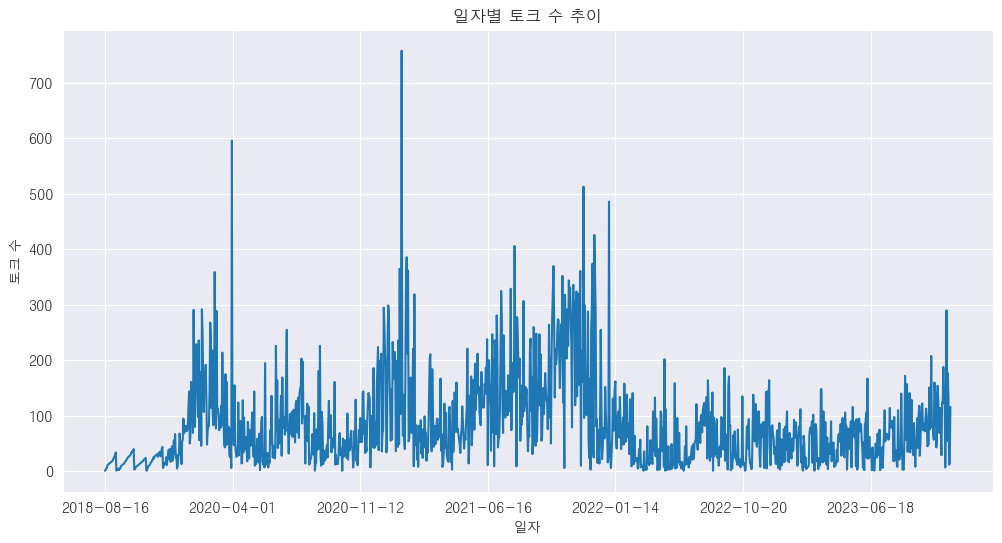

In [27]:
# 일자별 토크 수 추이
plt.figure(figsize=(12, 6))
talk.groupby('일자')['토크 수'].sum().plot(kind='line')
plt.title('일자별 토크 수 추이')
plt.xlabel('일자')
plt.ylabel('토크 수')
plt.show()

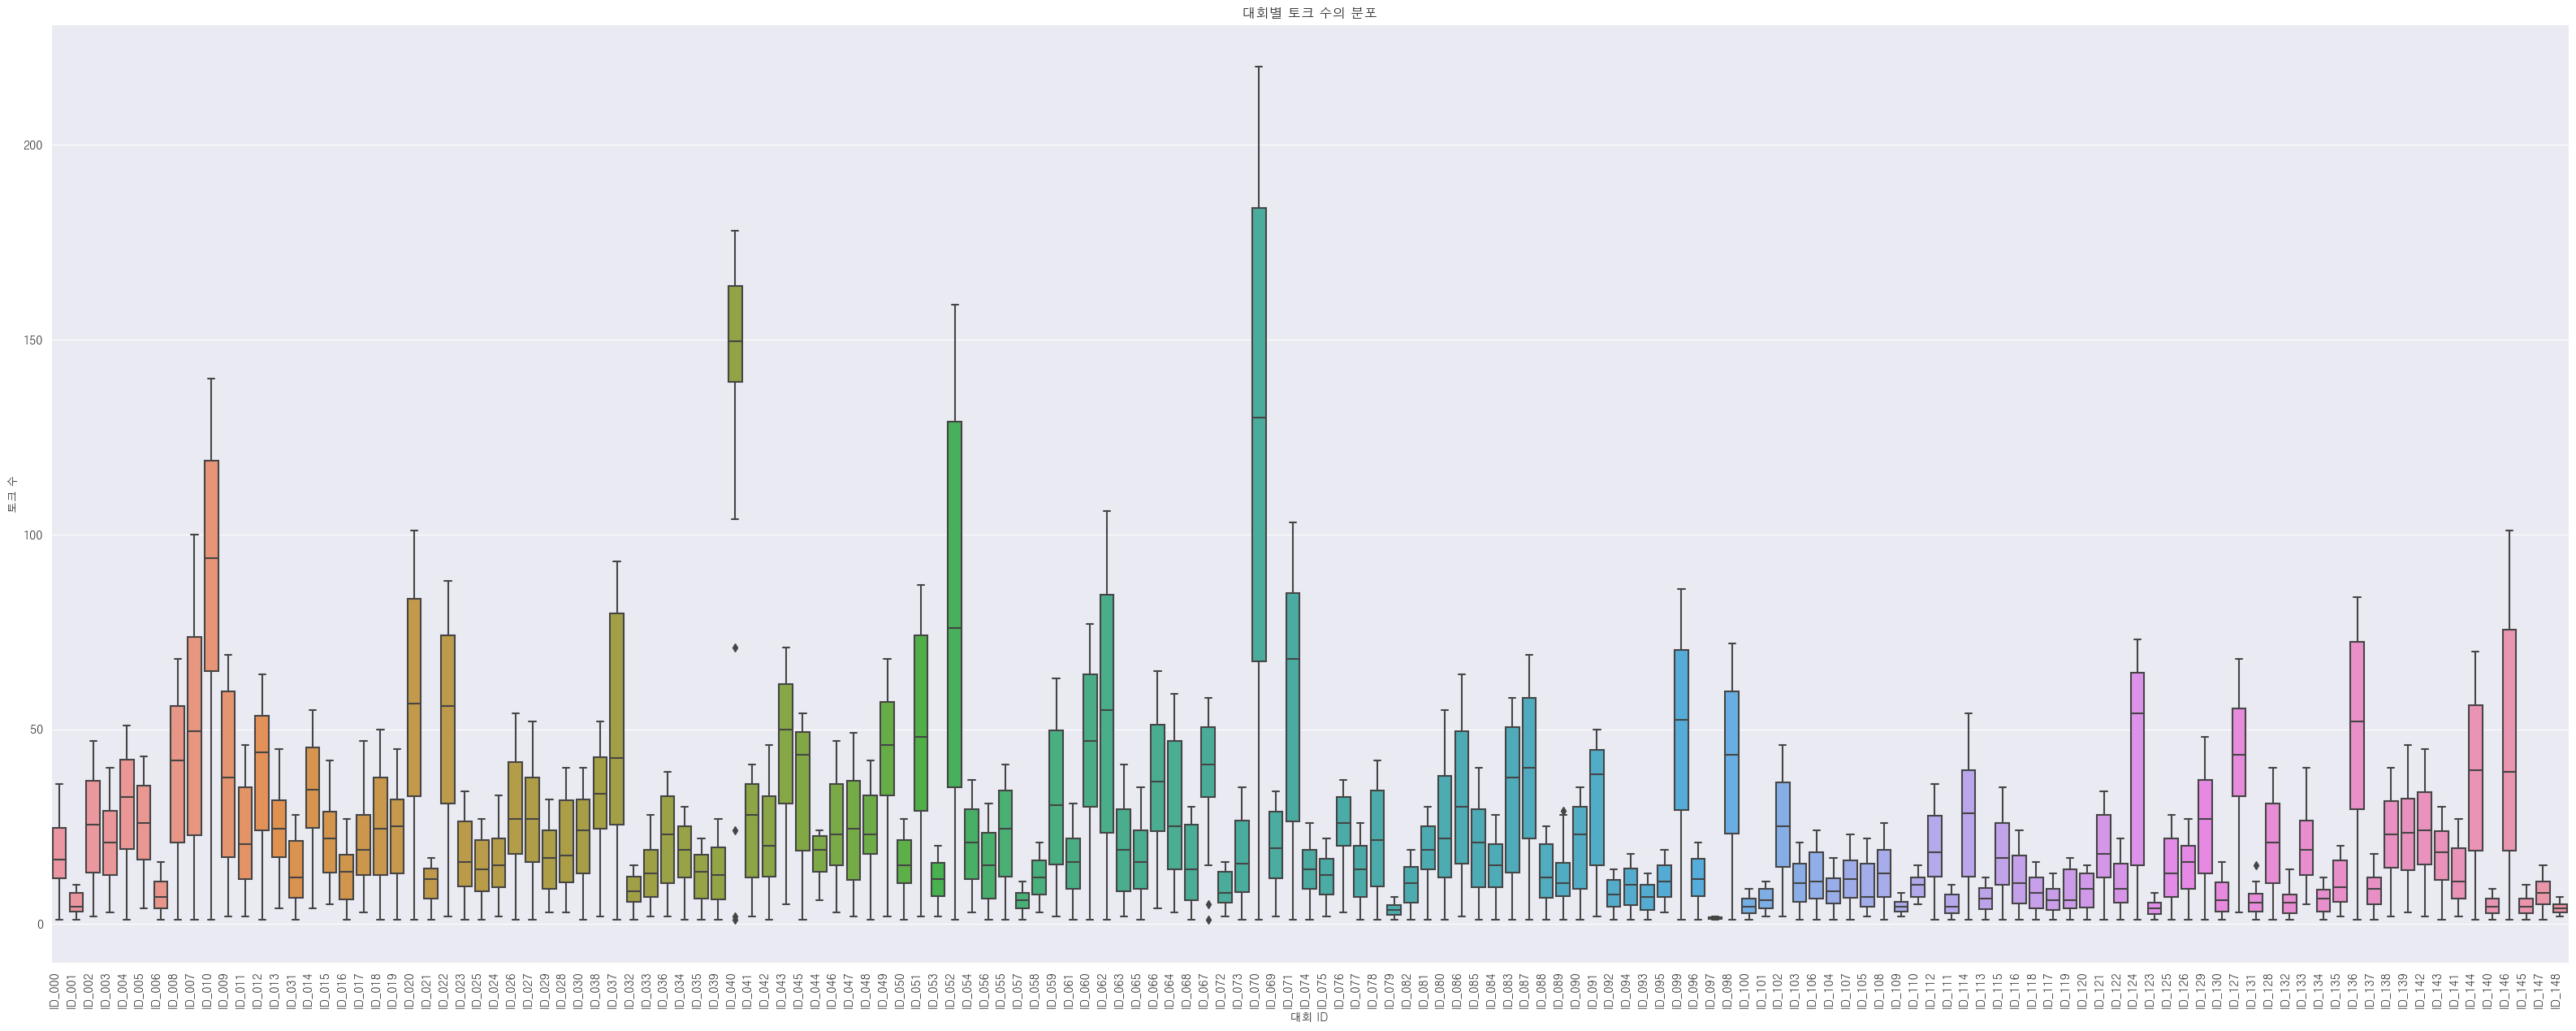

In [35]:
# 대회별 토크 수의 분포
plt.figure(figsize=(40, 15))
sns.boxplot(x='ID', y='토크 수', data=talk)
plt.title('대회별 토크 수의 분포')
plt.xlabel('대회 ID')
plt.ylabel('토크 수')
plt.xticks(rotation=90, ha='right')  # x축 눈금을 90도 기울임
plt.show()


##### 파생변수 생성

In [57]:
# competition['시작시간'] = pd.to_datetime(competition['시작시간'])
# competition['종료시간'] = pd.to_datetime(competition['종료시간'])
# competition['대회기간'] = competition['종료시간'] - competition['시작시간']
competition['대회기간'] = competition['대회기간'].dt.days

In [58]:
competition.head()

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,...,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구...",30
1,ID_001,아파트 경매가격 예측 경진대회,알고리즘 | 정형 | 회귀 | 아파트 | RMSE,2018-10-18,2018-12-31,612,"$10,000 + 120,000ZPR",10.0,3,3.0,...,0,1,0,0,<h2>1.배경</h2><p>안녕하세요! <strong>아파트 경매 가격 예측 경진...,<p><br></p><p>[데이터 설명]</p><p><br></p><p>한국의 서울...,<h2>세부일정</h2><p><br></p><ul><li>제출 : 2018-10-1...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">제출한 ...",74
2,ID_002,KBO 타자 OPS 예측 경진대회,알고리즘 | 정형 | 회귀 | 스포츠 | WRMSE,2019-02-08,2019-07-18,1103,800만원,5.0,3,3.0,...,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>KBO 타자 OP...,"<p>약 350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공...",<h2>세부 일정</h2><p><br></p><ul><li>대회 공개 : 2019....,<p>? 총 상금 800만원</p><p><br></p><p>?1위 - 500만원</...,<h2>모델링 규칙</h2><p>\n각 참가자는 3월 31일까지 여러 submiss...,160
3,ID_003,상점 신용카드 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 매출 | 회귀 | MAE,2019-07-11,2019-10-21,1416,200만원,5.0,3,100.0,...,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>상점 신용카드 매...,<p>1. funda_train.csv : 2019-02-28일까지의 상점별 카드 ...,<h2>세부 일정</h2><p>UTC+9 기준</p><p><br></p><ul><l...,<p>?7월 11일부터&nbsp;8월 30일까지 열렸던 대회에 대한 상금은 아래와 ...,<h2>단계별 방식 랭킹\n</h2><p><br></p><p> A. public...,102
4,ID_004,전력 수요량 예측 경진대회,알고리즘 | 정형 | 회귀 | 공공 | SMAPE,2019-10-01,2019-10-27,789,600만원,4.0,3,3.0,...,0,1,0,0,<h2>1. 배경</h2><p>안녕하세요 여러분!? <strong>전력 수요량 예측...,<p>본 대회에서는 2016년 7월 20일부터 2018년 6월 30일까지의 국내 특...,<h2>세부 일정 </h2><p>UTC+ 9 기준</p><p><br></p><ul>...,<p><strong>데이터 사이언스 콘테스트 부문</strong></p><p>?1등...,<p><br></p><p>SMAPE는 Symmetric Mean Absolute P...,26


###### Competition 제외 다른 데이터 프레임을 ID기준 gruopby 및 sum

In [59]:
codeshare_sum = codeshare.groupby('ID')['코드 공유 수'].sum()
participate_sum = participate.groupby('ID')['참가자 수'].sum()
submission_sum = submission.groupby('ID')['제출 수'].sum()
talk_sum = talk.groupby('ID')['토크 수'].sum()

In [60]:
df_temp = pd.merge(codeshare_sum, participate_sum, on='ID', how='outer')
df_temp = pd.merge(df_temp, submission_sum, on='ID', how='outer')
df_temp = pd.merge(df_temp, talk_sum, on='ID', how='outer')
df_temp

,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_000,54.0,1,1109.0,356
ID_001,4.0,2,1856.0,32
ID_002,5.0,97,210.0,760
ID_003,127.0,88,840.0,655
ID_004,25.0,122,1006.0,1090
...,...,...,...,...
ID_145,39.0,110,1279.0,39
ID_146,103.0,812,6003.0,1648
ID_147,14.0,940,2824.0,105


In [61]:
# NaN값을 가진 대회를 확인하기 위한 리스트 추출
nan_rows = df_temp[df_temp.isna().any(axis=1)].index.tolist()
nan_rows

['ID_105',
 'ID_110',
 'ID_111',
 'ID_124',
 'ID_127',
 'ID_130',
 'ID_135',
 'ID_144',
 'ID_044']

In [63]:
for id in nan_rows:
    print(id)
    display(competition[competition['ID'] == id])
    display(df_temp[df_temp.index == id])
    print()

ID_105


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
105,ID_105,월간 데이콘 KOSPI 기반 분석 시각화 경진대회,분석시각화 | 정형 | 분석 | 금융 | 정성평가,2022-09-01,2022-10-04,412,인증서,5.0,5,5.0,...,0,1,1,1,<h3>[배경]&nbsp;</h3><p>안녕하세요 데이커 여러분! <span sty...,"<p><strong style=""color: rgb(0, 102, 204);"">Da...",<h2><strong>세부 일정</strong></h2><p><br></p><ul>...,<h3>? 수상 인증서 ?</h3><p><br></p><p>: 대회 1등부터 5등까...,<h2>규칙</h2><p><br></p><h3>1. 평가 방법</h3><ul><li...,33


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_105,264.0,208,NaN,112



ID_110


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
110,ID_110,대도시권 광역교통 빅데이터 분석 시각화 및 활용 아이디어 경진대회,분석아이디어 | 정형 | 교통 | 정성평가,2022-10-11,2022-11-14,336,"1,000 만원",4.0,4,5.0,...,0,1,1,0,<h3>[경진대회 개최 목적]</h3><p>데이터 분석을 통해 광역교통 분야 빅데이...,<p><strong>[데이터 링크]</strong></p><p><strong sty...,"<p><img src=""https://dacon.s3.ap-northeast-2.a...","<h3>[시상 내역]</h3><p><img src=""https://dacon.s3....","<h3>1. 참가방법 및 제출물</h3><p><br></p><p><img src=""...",34


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_110,14.0,222,NaN,88



ID_111


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
111,ID_111,디지털 활용 관광 산업발전 BI(Business Idea) 경진대회,제주도 | 관광 | 산업 | 분석 아이디어,2022-10-11,2022-11-28,173,상품,3.0,4,5.0,...,0,1,1,0,<h3>[배경]&nbsp;</h3><p>관광과 디지털 기술의 융합으로 관광산업의 흐...,<p>공공데이터 활용</p><p><br></p><p>[참고 링크] 관광 관련 데이터...,<h3>대회 시작</h3><ul><li>2022년 10월 11일 10:00</li>...,"<h3><span style=""background-color: transparent...",<h3>1. 참가방법 및 제출물</h3><p><br></p><p>\t\t <im...,48


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_111,15.0,141,NaN,41



ID_124


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
124,ID_124,데이크루 4기,데이크루 | 서포터즈 | 4기,2023-01-05,2023-02-24,178,NaN,4.0,4,500.0,...,0,0,1,0,<p><strong>[소개]</strong></p><p>데이크루(DACrew)는 데...,NaN,<h3>팀장 신청인 온라인 오리엔테이션</h3><ul><li>2023년 1월 10일...,<p><strong>[우수 활동 4팀 시상]</strong></p><p>최우수 1팀...,<ol><li>활동 기간 동안 팀 별로 여섯 개의 게시물을 업로드 합니다.</li>...,50


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_124,941.0,23,NaN,1310



ID_127


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
127,ID_127,데이크루 5기,데이크루 | 서포터즈 | 5기,2023-04-03,2023-05-26,115,"기프티콘, 인증서",1.0,20,500.0,...,0,1,1,0,<h3><strong>[소개]</strong></h3><p>데이크루(DACrew)는...,NaN,<h3>데이크루 페이지 오픈</h3><ul><li>2023년 3월 29일 </li>...,<h3><strong>[우수 활동 시상]</strong></h3><p>? 1~20등...,<h3>[유의 사항]</h3><ol><li>이번 데이크루 5기는 <strong>개인...,53


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_127,21.0,79,NaN,1364



ID_130


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
130,ID_130,"신한AI, 보다 나은 금융 생활을 위한 AI 서비스 아이디어 경진대회",아이디어 | 금융 | AI | 서비스 | 플랫폼 | 알고리즘 | 정성평가,2023-04-10,2023-05-15,1036,500만원,5.0,3,5.0,...,0,1,1,0,<h3>[회사&nbsp;소개]</h3><p>신한AI는&nbsp;신한금융지주회사의&n...,"<p><strong style=""color: rgb(0, 102, 204);"">Da...","<h3><strong>상세 일정</strong></h3><p><img src=""ht...","<h3><span style=""color: rgb(0, 0, 0); backgrou...",<h3><strong>1. 참가방법 및 제출물</strong></h3><p><img...,35


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_130,1007.0,692,NaN,72



ID_135


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
135,ID_135,데이크루 6기,데이크루 | 서포터즈 | 6기,2023-06-19,2023-09-01,154,NaN,5.0,5,500.0,...,0,1,1,0,"<h1>[참여 링크]</h1><h1><a href=""https://forms.gle...","<p>데이터 다운받는 곳은 </p><p>토크 게시판에 있습니다. (<a href=""...",<h3>모집</h3><ul><li>2023년 6월 19일 ~ 2023년 6월 30일...,<h3><strong>[우수 활동 5팀 시상]</strong></h3><ul><li...,<h3>[유의 사항]</h3><ul><li>팀 구성은 1명부터 최대 5명까지 가능합...,74


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_135,331.0,131,NaN,171



ID_144


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
144,ID_144,"2023 NH 투자증권 빅데이터 경진대회, “블룸버그, 나스닥과 함께 세계속으로!”",아이디어 | 정형 | 언어 | 해외주식 분석 | 금융 | 정성평가,2023-09-04,2023-10-16,855,"5,000만 원",3.0,10,5.0,...,0,1,1,0,"<h1><img src=""https://dacon.s3.ap-northeast-2....","<h4>대회에 참가하여 데이터를 다운받고자 할 경우 <span style=""colo...",<h3>신청 기간</h3><p>2023년 08년 16일 10:00 ~ 2023년 1...,"<h3><span style=""background-color: transparent...",<h3><strong>1. 참가방법 및 제출물</strong></h3><p clas...,42


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_144,351.0,526,NaN,1539



ID_044


,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,...,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙,대회기간
44,ID_044,제2회 팩토리핵 코리아,알고리즘 | 정형 | 회귀 | 산업 | MAE,2021-01-08,2021-01-15,27,NaN,3.0,3,20.0,...,0,0,0,0,"<h2>1.배경</h2><p><span style=""background-color:...",<p>train.csv : 학습 데이터</p><p>&nbsp;- 1331 cases...,"<ul><li><span style=""background-color: transpa...","<p><span style=""background-color: transparent;...","<h2><span style=""color: rgb(68, 68, 68);"">리더보드...",7


,코드 공유 수,참가자 수,제출 수,토크 수
ID,,,,
ID_044,NaN,22,810.0,121


-> '제출 수'가 없는 대회가 있음(코드 제출이 없는 대회)
이는 데이터 분석 및 아이디어 제시 대회로 추정